# Statistical Learning I
## PROYECTO DE CURSO – FASE 1
### Notebook 1
##### René Ronaldo Godoy Mejía, carné 23005126
##### Carlos Eduardo Carrera Roda, carné 23002113

El dataset a utilizar incluye información para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, los cuales están etiquetados con la variable de clase "NObesidad" (Nivel de Obesidad), la cual seré la variable a predecir, que permite la clasificación de los datos utilizando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('ObesityDataSet.csv')
print(data.head())


    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   NaN   
1  21.0  Female    1.52    56.0         NaN   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   NaN   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0  NaN    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

## Estadistica Descriptiva

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2002 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2019 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2017 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:

print(data.describe(include='all'))

                Age Gender       Height       Weight       CALC  FAVC  \
count   2111.000000   2111  2111.000000  2111.000000       2002  2111   
unique          NaN      2          NaN          NaN          4     2   
top             NaN   Male          NaN          NaN  Sometimes   yes   
freq            NaN   1068          NaN          NaN       1292  1866   
mean      24.313236    NaN     1.701677    86.586058        NaN   NaN   
std        6.346008    NaN     0.093305    26.191172        NaN   NaN   
min       14.000000    NaN     1.450000    39.000000        NaN   NaN   
25%       19.947192    NaN     1.630000    65.473343        NaN   NaN   
50%       22.789402    NaN     1.700499    83.000000        NaN   NaN   
75%       26.000000    NaN     1.768464   107.430682        NaN   NaN   
max       61.000000    NaN     1.980000   173.000000        NaN   NaN   

               FCVC          NCP   SCC SMOKE         CH2O  \
count   2111.000000  2111.000000  2019  2111  2017.000000   
u

## Missing Values

In [6]:
print(data.isnull().sum())

Age                                 0
Gender                              0
Height                              0
Weight                              0
CALC                              109
FAVC                                0
FCVC                                0
NCP                                 0
SCC                                92
SMOKE                               0
CH2O                               94
family_history_with_overweight      0
FAF                                 0
TUE                                 0
CAEC                                0
MTRANS                              0
NObeyesdad                          0
dtype: int64


## Visualización de Variables Continuas

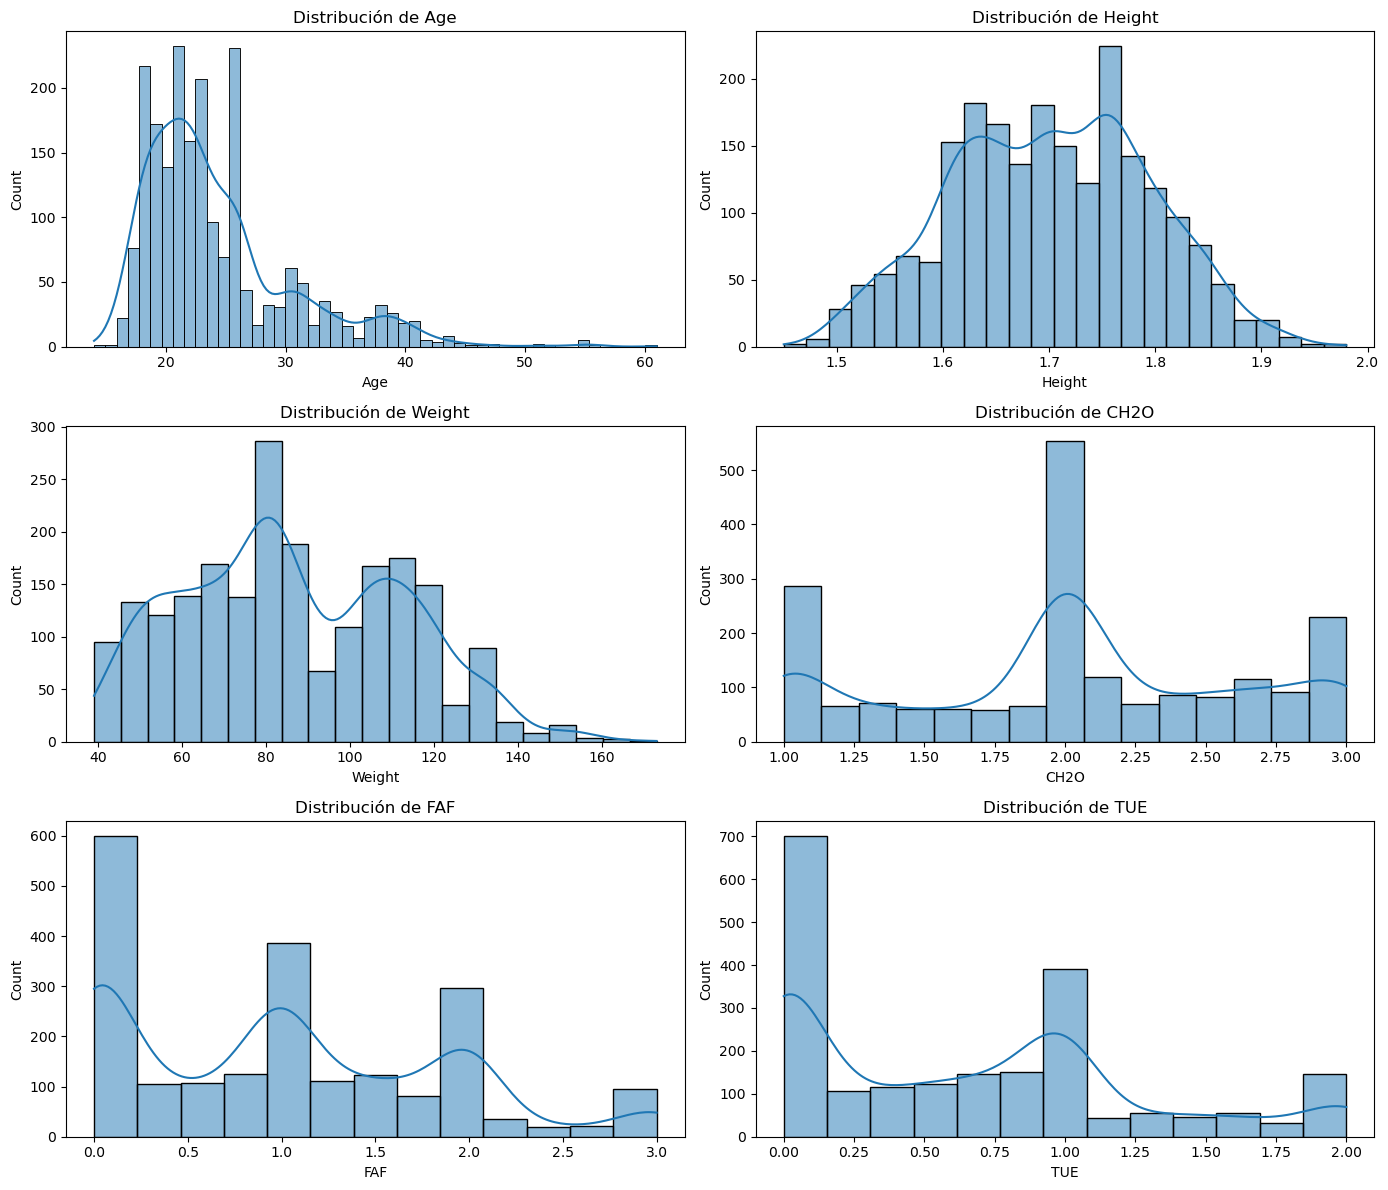

In [7]:
# Configurar las visualizaciones
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Variables continuas a visualizar
continuous_vars = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']
for i, var in enumerate(continuous_vars):
    sns.histplot(data[var], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {var}')

plt.tight_layout()
plt.show()

## Visualización de Variables Categóricas

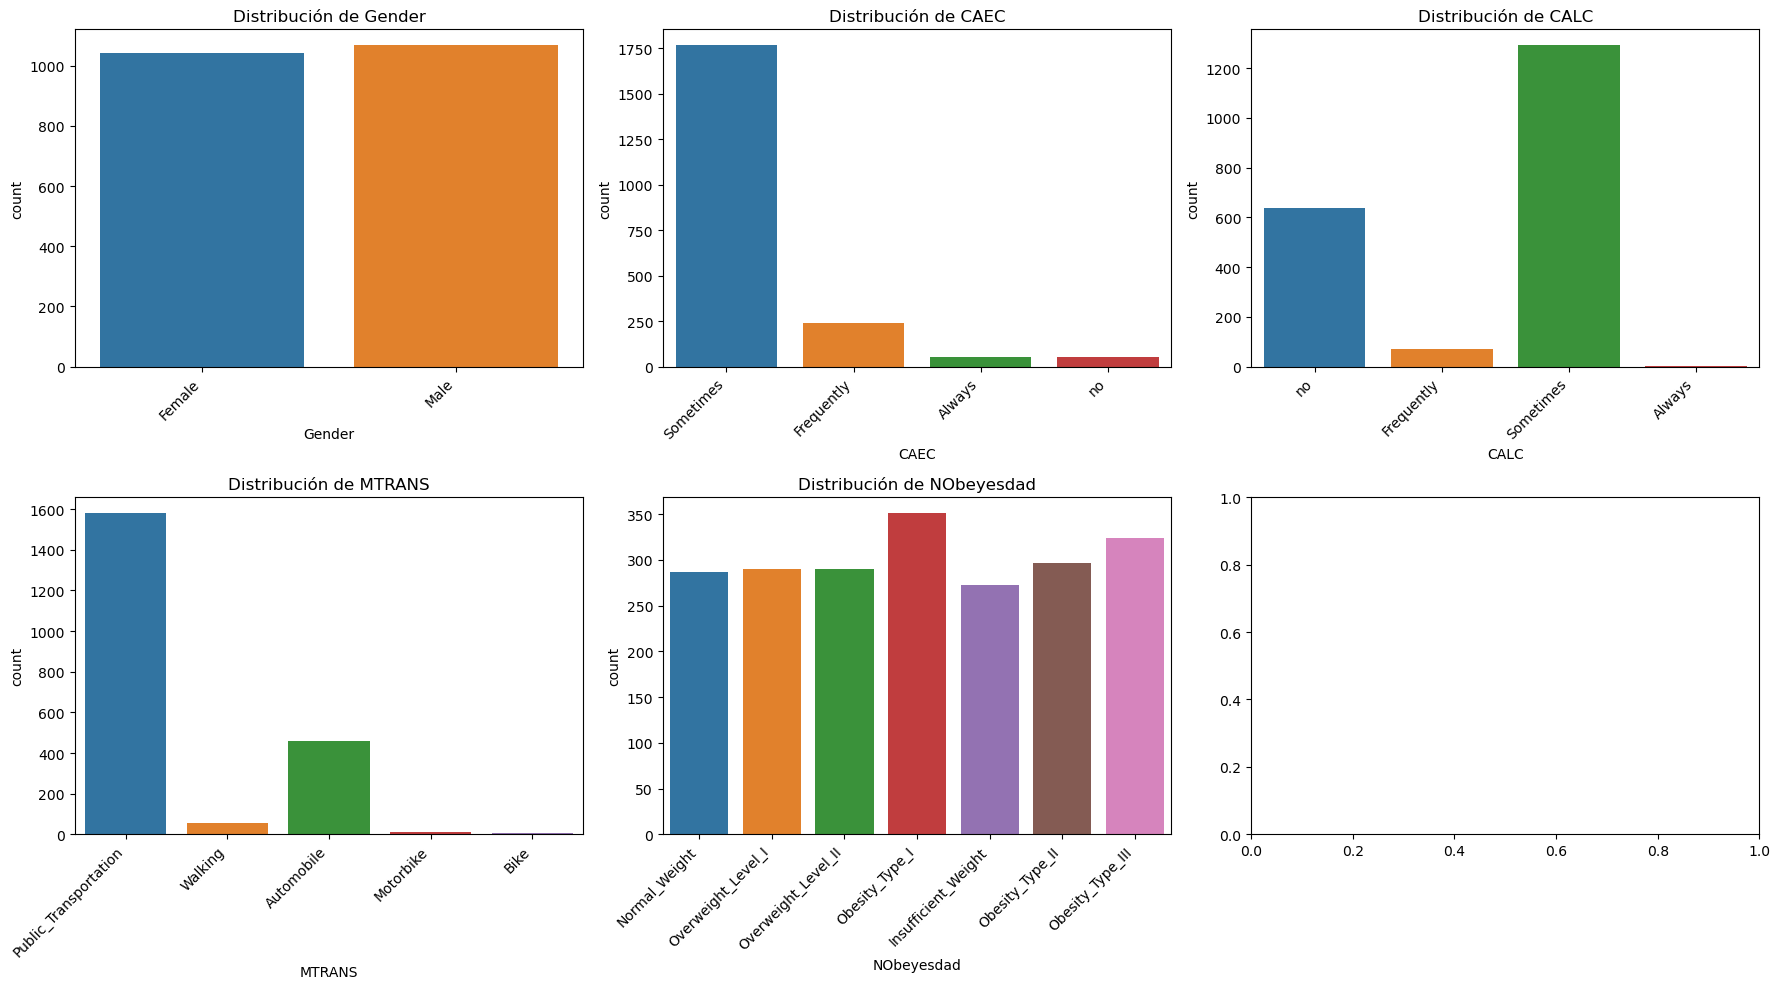

In [8]:
# Configurar las visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Variables categóricas a visualizar
categorical_vars = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
for i, var in enumerate(categorical_vars):
    sns.countplot(x=data[var], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribución de {var}')
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Correlaciones

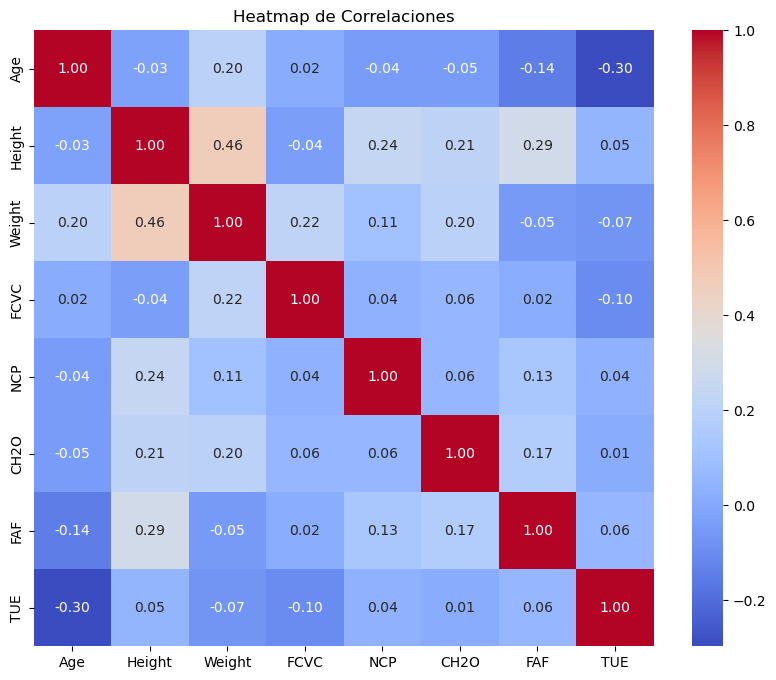

In [14]:
# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlaciones')
plt.show()

## Boxplots por nivel de obesidad

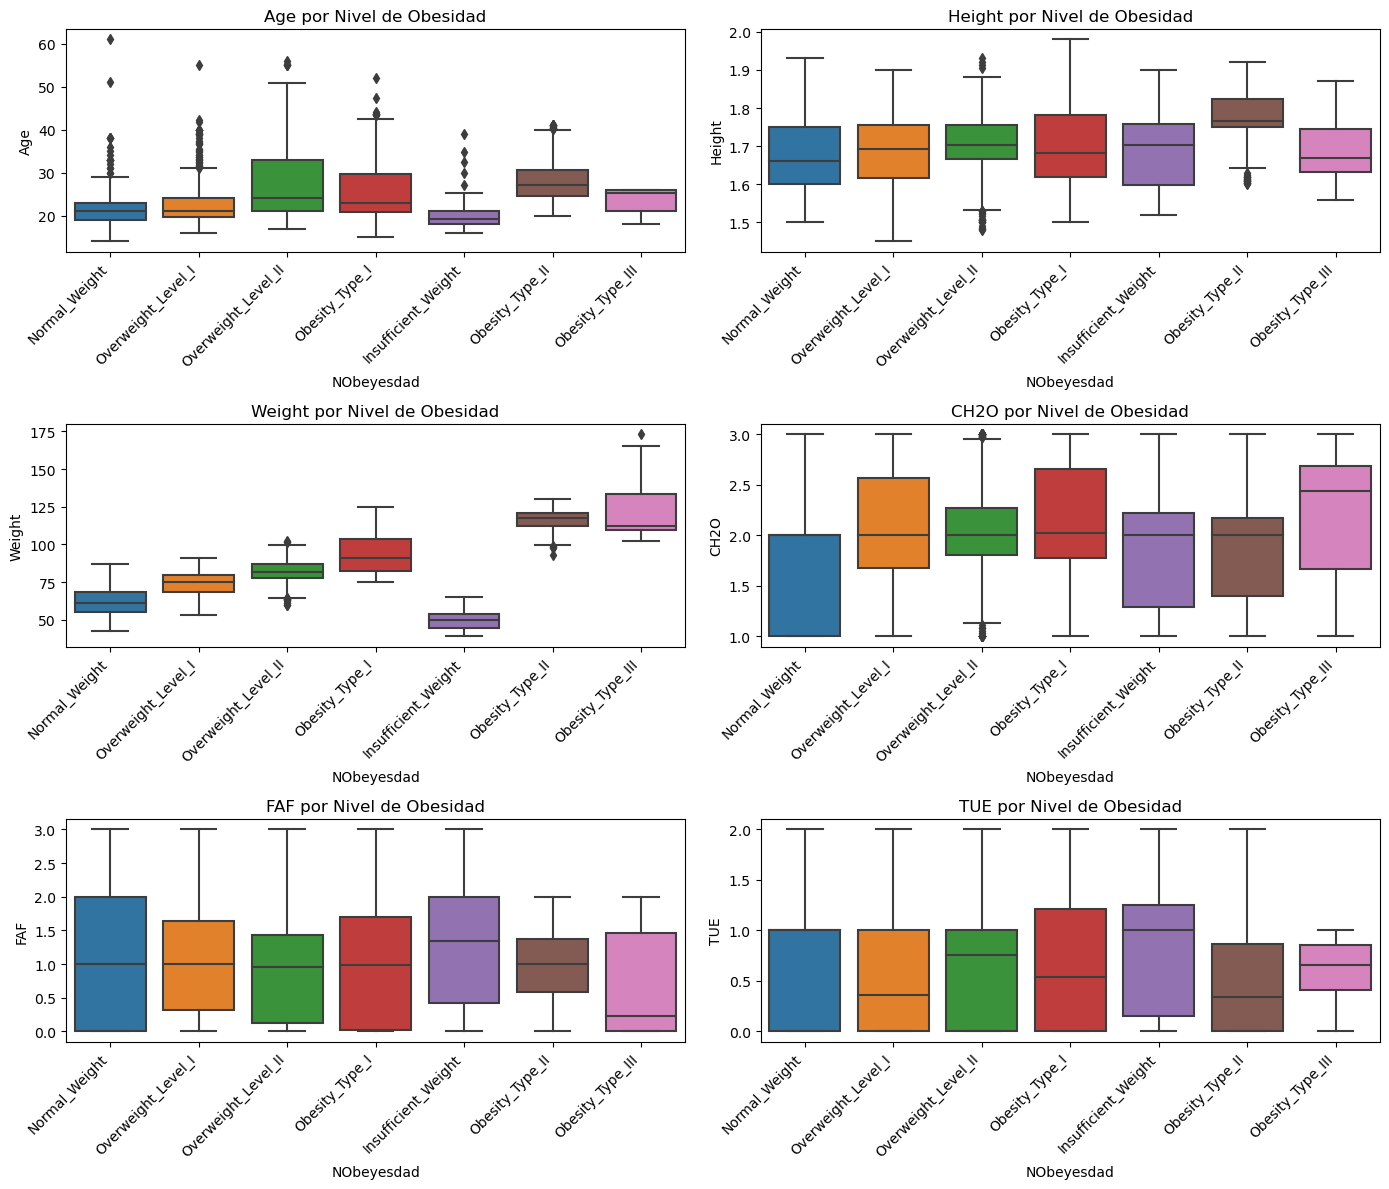

In [10]:
# Configurar las visualizaciones
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, var in enumerate(continuous_vars):
    sns.boxplot(x='NObeyesdad', y=var, data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{var} por Nivel de Obesidad')
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()